In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import statsmodels.api as sm
import joblib

# a. Data Audit: 

In [2]:
isd = pd.read_csv("C://Users//Lenovo//Desktop//Python//integrated case study python//Inventory_Stock_Data.csv")
ssd = pd.read_csv("C://Users//Lenovo//Desktop//Python//integrated case study python//Sales_Shipment_Data.csv")

In [3]:
# named isd based on Inventory_Stock_Data
isd.head()

order-now  product id                                product name  \
0     green          19     Nike Men's Fingertrap Max Training Shoe   
1    orange          24                 Elevation Training Mask 2.0   
2     green          35     adidas Brazuca 2014 Official Match Ball   
3     green          37       adidas Kids' F5 Messi FG Soccer Cleat   
4    orange          44  adidas Men's F10 Messi TRX FG Soccer Cleat   

   avg lead time  avg order qty  current stock  max lead time  max order qty  \
0             10              1             69             30              1   
1             10              3            175             30              5   
2             10              1             65             30              1   
3             10              3            328             30              5   
4             10              3            175             30              5   

   mod  reorder point  safety stock  
0    1             35            25  
1    0            175           144  
2    1             35            25  
3    1            175           146  
4    0            175           145

In [4]:
# names based on Sales_Shipment_Data
ssd.head()

Product Category Id    Category Name                           Class  \
0                   24  Women's Apparel  Moderate Value-Moderate Number   
1                   24  Women's Apparel  Moderate Value-Moderate Number   
2                   24  Women's Apparel  Moderate Value-Moderate Number   
3                   24  Women's Apparel  Moderate Value-Moderate Number   
4                   24  Women's Apparel  Moderate Value-Moderate Number   

     Customer City Customer Country Customer Fname  Customer Id  \
0          Roswell          EE. UU.           Jean         5673   
1      Los Angeles          EE. UU.           Rose         9723   
2           Harvey          EE. UU.         Joshua         9511   
3         Elmhurst          EE. UU.           Mary         3326   
4  North Las Vegas          EE. UU.       Samantha          907   

  Customer Lname Customer Segment Customer State  ...  \
0           Dunn        Corporate             NM  ...   
1          White        Corporate             CA  ...   
2          Brady        Corporate             IL  ...   
3          Smith        Corporate             IL  ...   
4          Kline        Corporate             NV  ...   

  Order Item Discount Rate  Order Item Id Order Item Product Price  \
0                     0.15         134920                     50.0   
1                     0.16           9722                     50.0   
2                     0.06         129954                     50.0   
3                     0.05           2929                     50.0   
4                     0.05         140056                     50.0   

   Order Item Profit Ratio Order Item Quantity Order Item Total  \
0                     0.11                   2             85.0   
1                     0.11                   2             84.0   
2                     0.33                   2             94.5   
3                     0.29                   2             95.0   
4                     0.50                   2             95.0   

  Order Profit Per Order Product Price  Sales  Sales per customer  
0               9.610000          50.0  100.0                85.0  
1               9.490000          50.0  100.0                84.0  
2              30.709999          50.0  100.0                94.5  
3              27.549999          50.0  100.0                95.0  
4              47.500000          50.0  100.0                95.0  

[5 rows x 46 columns]

In [5]:
isd.shape

(118, 11)

In [6]:
ssd.shape

(180519, 46)

In [7]:
numerical_columns_isd = [col for col in isd.columns if isd[col].dtype in ['int64', 'float64']]
categorical_columns_isd = [col for col in isd.columns if isd[col].dtype == 'object']

In [8]:
numerical_columns_isd

['product id',
 'avg lead time',
 'avg order qty',
 'current stock',
 'max lead time',
 'max order qty',
 'mod',
 'reorder point',
 'safety stock']

In [9]:
len(numerical_columns_isd)

9

In [10]:
categorical_columns_isd

['order-now', 'product name']

In [11]:
len(categorical_columns_isd)

2

In [12]:
numerical_columns_ssd = [col for col in ssd.columns if ssd[col].dtype in ['int64', 'float64']]
categorical_columns_ssd = [col for col in ssd.columns if ssd[col].dtype == 'object']

In [13]:
numerical_columns_ssd

['Product Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Product Id',
 'Benefit per order',
 'Days for shipment (scheduled)',
 'Days for shipping (real)',
 'Latitude',
 'Longitude',
 'Order Customer Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price',
 'Sales',
 'Sales per customer']

In [14]:
len(numerical_columns_ssd)

24

In [15]:
categorical_columns_ssd

['Category Name',
 'Class',
 'Customer City',
 'Customer Country',
 'Customer Fname',
 'Customer Lname',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Delivery Status',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Name',
 'shipping date (DateOrders)',
 'Shipping Mode',
 'Type']

In [16]:
len(categorical_columns_ssd)

22

In [17]:
isd.isnull().sum()

order-now        0
product id       0
product name     0
avg lead time    0
avg order qty    0
current stock    0
max lead time    0
max order qty    0
mod              0
reorder point    0
safety stock     0
dtype: int64

In [18]:
ssd.isnull().sum()

Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                             0
Benefit per order   

In [19]:
# to adjust the missing values by using mean for numerical values 
mean_cust_zipcode_ssd = ssd['Customer Zipcode'].mean()
ssd['Customer Zipcode'].fillna(mean_cust_zipcode_ssd, inplace=True)

# to adjust by using UNKNOWN for last name 
ssd['Customer Lname'].fillna('UNKNOWN', inplace=True)

In [20]:
ssd.isnull().sum()

Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                             0
Benefit per order   

# 	b. Data Preparation: 
1. Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) (Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)			

In [21]:
# Initially creating a column and making it all Not Late
ssd['Late Delivery Risk'] = 'Not Late' 
# Now based on the real and scheduled we will segregate it 
ssd.loc[(ssd['Days for shipping (real)'] > ssd['Days for shipment (scheduled)']), 'Late Delivery Risk'] = 'Late'

In [22]:
late_del = ssd[ssd['Late Delivery Risk']=='Late']
print('Total Number Of Late Delivery is',late_del.shape[0])

Total Number Of Late Delivery is 103400


In [23]:
sch_del = ssd[ssd['Late Delivery Risk']=='Not Late']
print('Total Number Of Scheduled Delivery is',sch_del.shape[0])

Total Number Of Scheduled Delivery is 77119


### 2. Rename the variables as per python naming convensions

In [24]:
column_mapping = {
    'Product Category Id': 'product_category_id',
    'Category Name': 'category_name',
    'Class': 'product_class',
    'Customer City': 'customer_city',
    'Customer Country': 'customer_country',
    'Customer Fname': 'customer_firstname',
    'Customer Id': 'customer_id',
    'Customer Lname': 'customer_lastname',
    'Customer Segment': 'customer_segment',
    'Customer State': 'customer_state',
    'Customer Street': 'customer_street',
    'Customer Zipcode': 'customer_zipcode',
    'Delivery Status': 'delivery_status',
    'Department Id': 'department_id',
    'Department Name': 'department_name',
    'Market': 'market',
    'Order City': 'order_city',
    'Order Country': 'order_country',
    'order date (DateOrders)': 'order_date',
    'Order Id': 'order_id',
    'Order Region': 'order_region',
    'Order State': 'order_state',
    'Order Status': 'order_status',
    'Product Id': 'product_id',
    'Product Name': 'product_name',
    'shipping date (DateOrders)': 'shipping_date',
    'Shipping Mode': 'shipping_mode',
    'Type': 'product_type',
    'Benefit per order': 'benefit_per_order',
    'Days for shipment (scheduled)': 'days_for_shipment_scheduled',
    'Days for shipping (real)': 'days_for_shipping_real',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'Order Customer Id': 'order_customer_id',
    'Order Item Cardprod Id': 'order_item_cardprod_id',
    'Order Item Discount': 'order_item_discount',
    'Order Item Discount Rate': 'order_item_discount_rate',
    'Order Item Id': 'order_item_id',
    'Order Item Product Price': 'order_item_product_price',
    'Order Item Profit Ratio': 'order_item_profit_ratio',
    'Order Item Quantity': 'order_item_quantity',
    'Order Item Total': 'order_item_total',
    'Order Profit Per Order': 'order_profit_per_order',
    'Product Price': 'product_price',
    'Sales': 'sales',
    'Sales per customer': 'sales_per_customer',
    'Late Delivery Risk': 'late_delivery_risk'
}

ssd.rename(columns=column_mapping, inplace=True)

In [25]:
ssd.columns

Index(['product_category_id', 'category_name', 'product_class',
       'customer_city', 'customer_country', 'customer_firstname',
       'customer_id', 'customer_lastname', 'customer_segment',
       'customer_state', 'customer_street', 'customer_zipcode',
       'delivery_status', 'department_id', 'department_name', 'market',
       'order_city', 'order_country', 'order_date', 'order_id', 'order_region',
       'order_state', 'order_status', 'product_id', 'product_name',
       'shipping_date', 'shipping_mode', 'product_type', 'benefit_per_order',
       'days_for_shipment_scheduled', 'days_for_shipping_real', 'latitude',
       'longitude', 'order_customer_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'order_item_total', 'order_profit_per_order',
       'product_price', 'sales', 'sales_per_customer', 'late_delivery_risk'],
      dtype

In [26]:
column_mapping_isd = {
    'order-now': 'order_now',
    'product id': 'product_id',
    'product name': 'product_name',
    'avg lead time': 'avg_lead_time',
    'avg order qty': 'avg_order_qty',
    'current stock': 'current_stock',
    'max lead time': 'max_lead_time',
    'max order qty': 'max_order_qty',
    'mod': 'mod',
    'reorder point': 'reorder_point',
    'safety stock': 'safety_stock'
}
isd.rename(columns=column_mapping_isd, inplace=True)

isd.columns

Index(['order_now', 'product_id', 'product_name', 'avg_lead_time',
       'avg_order_qty', 'current_stock', 'max_lead_time', 'max_order_qty',
       'mod', 'reorder_point', 'safety_stock'],
      dtype='object')

### 3. Convert the variables data types as per the data descriptions

In [27]:
data_type_mapping = {
    'product_category_id': int,
    'category_name': str,
    'product_class': str,
    'customer_city': str,
    'customer_country': str,
    'customer_firstname': str,
    'customer_id': int,
    'customer_lastname': str,
    'customer_segment': str,
    'customer_state': str,
    'customer_street': str,
    'customer_zipcode': str,
    'delivery_status': str,
    'department_id': int,
    'department_name': str,
    'market': str,
    'order_city': str,
    'order_country': str,
    'order_id': int,
    'order_region': str,
    'order_state': str,
    'order_status': str,
    'product_id': int,
    'product_name': str,
    'shipping_mode': str,
    'product_type': str,
    'benefit_per_order': float,
    'days_for_shipment_scheduled': int,
    'days_for_shipping_real': int,
    'latitude': float,
    'longitude': float,
    'order_customer_id': int,
    'order_item_cardprod_id': int,
    'order_item_discount': float,
    'order_item_discount_rate': float,
    'order_item_id': int,
    'order_item_product_price': float,
    'order_item_profit_ratio': float,
    'order_item_quantity': int,
    'order_item_total': float,
    'order_profit_per_order': float,
    'product_price': float,
    'sales': float,
    'sales_per_customer': float,
    'late_delivery_risk': str  
}

ssd['shipping_date'] = pd.to_datetime(ssd['shipping_date'],format='mixed')
ssd['order_date'] = pd.to_datetime(ssd['order_date'],format='mixed')

ssd = ssd.astype(data_type_mapping)

In [28]:
ssd.dtypes

product_category_id                     int32
category_name                          object
product_class                          object
customer_city                          object
customer_country                       object
customer_firstname                     object
customer_id                             int32
customer_lastname                      object
customer_segment                       object
customer_state                         object
customer_street                        object
customer_zipcode                       object
delivery_status                        object
department_id                           int32
department_name                        object
market                                 object
order_city                             object
order_country                          object
order_date                     datetime64[ns]
order_id                                int32
order_region                           object
order_state                       

In [29]:
data_type_mapping_isd = {
    'order_now': bool,               
    'product_id': int,               
    'product_name': str,           
    'avg_lead_time': int,           
    'avg_order_qty': int,           
    'current_stock': int,          
    'max_lead_time': int,           
    'max_order_qty': int,           
    'mod': str,                     
    'reorder_point': int,           
    'safety_stock': int             
}

# Use the astype method to change the data types
isd = isd.astype(data_type_mapping_isd)

isd.dtypes

order_now          bool
product_id        int32
product_name     object
avg_lead_time     int32
avg_order_qty     int32
current_stock     int32
max_lead_time     int32
max_order_qty     int32
mod              object
reorder_point     int32
safety_stock      int32
dtype: object

# c. List of Analysis:

In [30]:
# have joined the table for detailed analysis 
df = pd.merge(ssd,isd,on='product_id',how='left')

### 1. Caclulate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products etc

In [31]:
# Calculate total sale value
total_sale_value = df['sales'].sum()

# Calculate total sale units
total_sale_units = df['order_item_quantity'].sum()

# Calculate inventory value
inventory_value = (df['current_stock'] * df['product_price']).sum()

# Calculate inventory quantity
inventory_quantity = df['current_stock'].sum()

# Calculate profit value
profit_value = df['order_profit_per_order'].sum()

# Number of distinct products
distinct_products = df['product_id'].nunique()

# Number of distinct categories
distinct_categories = df['product_category_id'].nunique()

# Number of distinct customers
distinct_customers = df['customer_id'].nunique()

# Print the calculated metrics
print(f"Total Sale Value: {total_sale_value}")
print(f"Total Sale Units: {total_sale_units}")
print(f"Inventory Value: {inventory_value}")
print(f"Inventory Quantity: {inventory_quantity}")
print(f"Profit Value: {profit_value}")
print(f"Number of Distinct Products: {distinct_products}")
print(f"Number of Distinct Categories: {distinct_categories}")
print(f"Number of Distinct Customers: {distinct_customers}")


Total Sale Value: 36784735.01337984
Total Sale Units: 384079
Inventory Value: 2536160997.4468727
Inventory Quantity: 30378127
Profit Value: 3966902.9740503575
Number of Distinct Products: 118
Number of Distinct Categories: 51
Number of Distinct Customers: 20652


### 2. Status of orders (number of orders by current status)	

In [133]:
# Group the data by 'order_status' and count the number of orders in each status
order_status_counts = df.groupby('order_status')['order_id'].count()
order_status_counts =pd.DataFrame(order_status_counts)
order_status_counts = order_status_counts.rename(columns={'order_status': 'Order Status', 'order_id':'Count'})
order_status_counts 

Count
order_status          
Canceled          3692
Closed           19616
Complete         59491
On Hold           9804
Payment Review    1893
Pending          20227
Pending Payment  39832
Processing       21902
Suspected Fraud   4062

In [90]:
fig = px.bar(order_status_counts, x=order_status_counts.index, y=order_status_counts.values, labels={'x': 'Order Status', 'y': 'Count'})

# Customize the chart layout if needed
fig.update_layout(
    title='Order Status Counts',
    xaxis_title='Order Status',
    yaxis_title='Count'
)

# Show the chart
fig.show()

### 3. Status of Delivery of orders (number of orders by each type of delivery status)	

In [138]:
# Group the data by 'delivery_status' and count the number of orders for each delivery status
delivery_status_counts = df.groupby('delivery_status')['order_id'].count()
delivery_status_counts = pd.DataFrame(delivery_status_counts)
delivery_status_counts = delivery_status_counts.rename(columns={'delivery_status':'Delivery Status', 'order_id':'Count'})
delivery_status_counts

Count
delivery_status       
Advance          41592
Canceled          7754
Late             98977
On time          32196

In [92]:
fig = px.bar(
    x=delivery_status_counts.index,
    y=delivery_status_counts.values,
    labels={'x': 'Delivery Status', 'y': 'Count'},
    color=delivery_status_counts.index  # Separate color for each bar
)


fig.update_layout(
    title='Delivery Status Counts',
    xaxis_title='Delivery Status',
    yaxis_title='Count'
)

fig.show()

### 4. Late Delivery Risk by time (by each week, month, year, quarter)

In [34]:
# Extract year, month, and quarter from the 'order_date' column
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Calculate the week of the year and quarter based on the 'order_date' column
df['week'] = df['order_date'].dt.strftime('%U')
df['quarter'] = df['order_date'].dt.quarter

# Assuming 'df' is your combined DataFrame

# Calculate the total number of deliveries for each time period
total_deliveries_by_year = df.groupby('year')['order_id'].count()
total_deliveries_by_month = df.groupby(['year', 'month'])['order_id'].count()
total_deliveries_by_week = df.groupby(['year', 'week'])['order_id'].count()
total_deliveries_by_quarter = df.groupby(['year', 'quarter'])['order_id'].count()

# Calculate the number of late deliveries for each time period
late_deliveries_by_year = df[df['late_delivery_risk'] == 'Late'].groupby('year')['order_id'].count()
late_deliveries_by_month = df[df['late_delivery_risk'] == 'Late'].groupby(['year', 'month'])['order_id'].count()
late_deliveries_by_week = df[df['late_delivery_risk'] == 'Late'].groupby(['year', 'week'])['order_id'].count()
late_deliveries_by_quarter = df[df['late_delivery_risk'] == 'Late'].groupby(['year', 'quarter'])['order_id'].count()

# Calculate the number of scheduled deliveries for each time period
scheduled_deliveries_by_year = df[df['late_delivery_risk'] == 'Not Late'].groupby('year')['order_id'].count()
scheduled_deliveries_by_month = df[df['late_delivery_risk'] == 'Not Late'].groupby(['year', 'month'])['order_id'].count()
scheduled_deliveries_by_week = df[df['late_delivery_risk'] == 'Not Late'].groupby(['year', 'week'])['order_id'].count()
scheduled_deliveries_by_quarter = df[df['late_delivery_risk'] == 'Not Late'].groupby(['year', 'quarter'])['order_id'].count()


print('TOTAL DELIVERIES')
print(total_deliveries_by_year)
print(total_deliveries_by_month)
print(total_deliveries_by_week)
print(total_deliveries_by_quarter)

print('TOTAL LATE DELIVERIES')
print(late_deliveries_by_year)
print(late_deliveries_by_month)
print(late_deliveries_by_week)
print(late_deliveries_by_quarter)

print('SCHEDULED DELIVERIES')
print(scheduled_deliveries_by_year)
print(scheduled_deliveries_by_month)
print(scheduled_deliveries_by_week)
print(scheduled_deliveries_by_quarter)

TOTAL DELIVERIES
year
2015    62650
2016    62550
2017    53196
2018     2123
Name: order_id, dtype: int64
year  month
2015  1        5322
      2        4729
      3        5362
      4        5126
      5        5357
      6        5134
      7        5299
      8        5273
      9        5140
      10       5302
      11       5235
      12       5371
2016  1        5317
      2        4894
      3        5210
      4        5097
      5        5302
      6        5054
      7        5305
      8        5334
      9        5160
      10       5398
      11       5210
      12       5269
2017  1        5217
      2        4906
      3        5347
      4        5212
      5        5317
      6        4951
      7        5318
      8        5305
      9        5189
      10       2255
      11       2055
      12       2124
2018  1        2123
Name: order_id, dtype: int64
year  week
2015  00       501
      01      1185
      02      1207
      03      1210
      04      1219
      

In [35]:
# Calculate the proportion of late deliveries for each time period
proportion_late_by_year = late_deliveries_by_year / total_deliveries_by_year
proportion_late_by_month = late_deliveries_by_month / total_deliveries_by_month
proportion_late_by_week = late_deliveries_by_week / total_deliveries_by_week
proportion_late_by_quarter = late_deliveries_by_quarter / total_deliveries_by_quarter

print(proportion_late_by_year)
print(proportion_late_by_month)
print(proportion_late_by_week)
print(proportion_late_by_quarter)

year
2015    0.572658
2016    0.572998
2017    0.572148
2018    0.586905
Name: order_id, dtype: float64
year  month
2015  1        0.559376
      2        0.579192
      3        0.572175
      4        0.564378
      5        0.580735
      6        0.562719
      7        0.575958
      8        0.581453
      9        0.588521
      10       0.571105
      11       0.564088
      12       0.572705
2016  1        0.579462
      2        0.563343
      3        0.577735
      4        0.572494
      5        0.579781
      6        0.589038
      7        0.551932
      8        0.569741
      9        0.568411
      10       0.569285
      11       0.569290
      12       0.585500
2017  1        0.559709
      2        0.575418
      3        0.577707
      4        0.564658
      5        0.568366
      6        0.559887
      7        0.582926
      8        0.585862
      9        0.572943
      10       0.560532
      11       0.577616
      12       0.581450
2018  1        0.586

### 5. Order Item qty by time (by each week, month, year, quarter)

In [36]:
# Calculating the total quantity of order items for each time period
total_qty_by_year = df.groupby('year')['order_item_quantity'].sum()
total_qty_by_month = df.groupby(['year', 'month'])['order_item_quantity'].sum()
total_qty_by_week = df.groupby(['year', 'week'])['order_item_quantity'].sum()
total_qty_by_quarter = df.groupby(['year', 'quarter'])['order_item_quantity'].sum()


print("Total Order Item Quantity by Year:")
print(total_qty_by_year)

print("\nTotal Order Item Quantity by Month:")
print(total_qty_by_month)

print("\nTotal Order Item Quantity by Week:")
print(total_qty_by_week)

print("\nTotal Order Item Quantity by Quarter:")
print(total_qty_by_quarter)


Total Order Item Quantity by Year:
year
2015    138480
2016    137352
2017    106124
2018      2123
Name: order_item_quantity, dtype: int32

Total Order Item Quantity by Month:
year  month
2015  1        11854
      2        10438
      3        12062
      4        11287
      5        11902
      6        11203
      7        11800
      8        11612
      9        11366
      10       11703
      11       11463
      12       11790
2016  1        11597
      2        10765
      3        11349
      4        11208
      5        11603
      6        11008
      7        11652
      8        11683
      9        11284
      10       11936
      11       11493
      12       11774
2017  1        11605
      2        11070
      3        11676
      4        11189
      5        11033
      6        10194
      7        11091
      8        11095
      9        10502
      10        2490
      11        2055
      12        2124
2018  1         2123
Name: order_item_quantity, dtype: 

### 6. Sales units/value  by time (by each week, month, year, quarter)

In [37]:
# Calculating the total sales units and sales value for each time period
total_sales_units_by_year = df.groupby('year')['order_item_quantity'].sum()
total_sales_value_by_year = df.groupby('year')['sales'].sum()

total_sales_units_by_month = df.groupby(['year', 'month'])['order_item_quantity'].sum()
total_sales_value_by_month = df.groupby(['year', 'month'])['sales'].sum()

total_sales_units_by_week = df.groupby(['year', 'week'])['order_item_quantity'].sum()
total_sales_value_by_week = df.groupby(['year', 'week'])['sales'].sum()

total_sales_units_by_quarter = df.groupby(['year', 'quarter'])['order_item_quantity'].sum()
total_sales_value_by_quarter = df.groupby(['year', 'quarter'])['sales'].sum()

pd.options.display.float_format = '{:.2f}'.format

print("Total Sales Units by Year:")
print(total_sales_units_by_year)

print("\nTotal Sales Value by Year:")
print(total_sales_value_by_year)

print("\nTotal Sales Units by Month:")
print(total_sales_units_by_month)

print("\nTotal Sales Value by Month:")
print(total_sales_value_by_month)

print("\nTotal Sales Units by Week:")
print(total_sales_units_by_week)

print("\nTotal Sales Value by Week:")
print(total_sales_value_by_week)

print("\nTotal Sales Units by Quarter:")
print(total_sales_units_by_quarter)

print("\nTotal Sales Value by Quarter:")
print(total_sales_value_by_quarter)


Total Sales Units by Year:
year
2015    138480
2016    137352
2017    106124
2018      2123
Name: order_item_quantity, dtype: int32

Total Sales Value by Year:
year
2015   12340831.43
2016   12303817.32
2017   11808436.14
2018     331650.12
Name: sales, dtype: float64

Total Sales Units by Month:
year  month
2015  1        11854
      2        10438
      3        12062
      4        11287
      5        11902
      6        11203
      7        11800
      8        11612
      9        11366
      10       11703
      11       11463
      12       11790
2016  1        11597
      2        10765
      3        11349
      4        11208
      5        11603
      6        11008
      7        11652
      8        11683
      9        11284
      10       11936
      11       11493
      12       11774
2017  1        11605
      2        11070
      3        11676
      4        11189
      5        11033
      6        10194
      7        11091
      8        11095
      9        105

### 7. Profit orders/value  by time (by each week, month, year, quarter)

In [38]:
# Calculating the total profit value and number of orders for each time period
df['profit'] = df['sales'] * df['order_item_profit_ratio']

total_profit_by_year = df.groupby('year')['profit'].sum()
total_orders_by_year = df.groupby('year')['order_id'].count()

total_profit_by_month = df.groupby(['year', 'month'])['profit'].sum()
total_orders_by_month = df.groupby(['year', 'month'])['order_id'].count()

total_profit_by_week = df.groupby(['year', 'week'])['profit'].sum()
total_orders_by_week = df.groupby(['year', 'week'])['order_id'].count()

total_profit_by_quarter = df.groupby(['year', 'quarter'])['profit'].sum()
total_orders_by_quarter = df.groupby(['year', 'quarter'])['order_id'].count()

# Print the results
print("Total Profit Value by Year:")
print(total_profit_by_year)

print("\nTotal Number of Orders by Year:")
print(total_orders_by_year)

print("\nTotal Profit Value by Month:")
print(total_profit_by_month)

print("\nTotal Number of Orders by Month:")
print(total_orders_by_month)

print("\nTotal Profit Value by Week:")
print(total_profit_by_week)

print("\nTotal Number of Orders by Week:")
print(total_orders_by_week)

print("\nTotal Profit Value by Quarter:")
print(total_profit_by_quarter)

print("\nTotal Number of Orders by Quarter:")
print(total_orders_by_quarter)

Total Profit Value by Year:
year
2015   1469751.30
2016   1456875.94
2017   1453375.06
2018     38269.89
Name: profit, dtype: float64

Total Number of Orders by Year:
year
2015    62650
2016    62550
2017    53196
2018     2123
Name: order_id, dtype: int64

Total Profit Value by Month:
year  month
2015  1       124217.28
      2       110432.79
      3       127229.43
      4       119891.19
      5       125502.08
      6       122883.16
      7       127802.89
      8       131258.83
      9       126132.04
      10      114569.57
      11      116385.35
      12      123446.70
2016  1       119236.81
      2        95858.28
      3       112830.27
      4       127844.80
      5       123613.45
      6       115914.34
      7       134514.30
      8       122976.73
      9       136982.81
      10      129855.76
      11      121270.53
      12      115977.86
2017  1       128364.11
      2       128489.83
      3       132650.75
      4       129572.43
      5       128855.10
     

### 8. Order profit per order  by time (by each week, month, year, quarter)

In [39]:
# Calculate the average order profit per order for each time period
average_profit_per_order_by_year = df.groupby('year')['order_profit_per_order'].sum()
average_profit_per_order_by_month = df.groupby(['year', 'month'])['order_profit_per_order'].sum()
average_profit_per_order_by_week = df.groupby(['year', 'week'])['order_profit_per_order'].sum()
average_profit_per_order_by_quarter = df.groupby(['year', 'quarter'])['order_profit_per_order'].sum()

# Print the results
print("Total Order Profit per Order by Year:")
print(average_profit_per_order_by_year)

print("\nTotal Order Profit per Order by Month:")
print(average_profit_per_order_by_month)

print("\nTotal Order Profit per Order by Week:")
print(average_profit_per_order_by_week)

print("\nTotal Order Profit per Order by Quarter:")
print(average_profit_per_order_by_quarter)

Total Order Profit per Order by Year:
year
2015   1318856.90
2016   1310119.07
2017   1304085.11
2018     33841.89
Name: order_profit_per_order, dtype: float64

Total Order Profit per Order by Month:
year  month
2015  1       111660.74
      2        99140.66
      3       113778.21
      4       108083.68
      5       112147.90
      6       110147.16
      7       115624.06
      8       117979.77
      9       113467.94
      10      101757.87
      11      104427.36
      12      110641.55
2016  1       106780.95
      2        86809.49
      3       101259.99
      4       114976.62
      5       110716.12
      6       104196.07
      7       119941.72
      8       110729.54
      9       123384.71
      10      116781.97
      11      109539.20
      12      105002.69
2017  1       114843.85
      2       115111.07
      3       118688.90
      4       115961.06
      5       115014.64
      6       110399.29
      7       113026.70
      8       131501.16
      9       122462

### 9. Order count by country/state/  by time (by each week, month, year, quarter)

In [40]:
# Calculating the number of orders by country, state, and time period
order_count_by_country_state_year = df.groupby(['year', 'customer_country', 'customer_state'])['order_id'].count()
order_count_by_country_state_month = df.groupby(['year', 'month', 'customer_country', 'customer_state'])['order_id'].count()
order_count_by_country_state_week = df.groupby(['year', 'week', 'customer_country', 'customer_state'])['order_id'].count()
order_count_by_country_state_quarter = df.groupby(['year', 'quarter', 'customer_country', 'customer_state'])['order_id'].count()

# Print the results
print("Order Count by Country/State/Year:")
print(order_count_by_country_state_year)

print("\nOrder Count by Country/State/Month:")
print(order_count_by_country_state_month)

print("\nOrder Count by Country/State/Week:")
print(order_count_by_country_state_week)

print("\nOrder Count by Country/State/Quarter:")
print(order_count_by_country_state_quarter)

Order Count by Country/State/Year:
year  customer_country  customer_state
2015  EE. UU.           AL                    2
                        AR                   61
                        AZ                 1044
                        CA                10209
                        CO                  688
                                          ...  
2018  EE. UU.           VA                   24
                        WA                   10
                        WI                    5
                        WV                    2
      Puerto Rico       PR                  807
Name: order_id, Length: 177, dtype: int64

Order Count by Country/State/Month:
year  month  customer_country  customer_state
2015  1      EE. UU.           AR                 13
                               AZ                125
                               CA                914
                               CO                 67
                               CT                 18
        

### 10. Inventory Units by each class or cluster

In [140]:
inventory_units_by_class = df.groupby('product_class')['current_stock'].sum()
print("Inventory Units by Product Class:")
pd.DataFrame(inventory_units_by_class)

Inventory Units by Product Class:


current_stock
product_class                                
High Value-Small Number              13399842
Moderate Value-Moderate Number        6059123
Small Value-Large Number             10919162

In [93]:
fig = px.pie(
    values=inventory_units_by_class.values,
    names=inventory_units_by_class.index,
    title='Inventory Units by Product Class'
)

# Show the chart
fig.show()

### 11. Inventory Value by each class or cluster

In [141]:
df['inventory_value'] = df['current_stock'] * df['product_price']
inventory_value_by_product_class = df.groupby('product_class')['inventory_value'].sum()

print("Inventory Value by Product Class:")
pd.DataFrame(inventory_value_by_product_class)


Inventory Value by Product Class:


inventory_value
product_class                                  
High Value-Small Number           1387021061.21
Moderate Value-Moderate Number     561527223.10
Small Value-Large Number           587612713.13

In [94]:
fig = px.bar(
    x=inventory_value_by_product_class.values,
    y=inventory_value_by_product_class.index,
    orientation='h',
    title='Inventory Value by Product Class'
)

# Customize the appearance
fig.update_traces(marker_color='skyblue')

# Add labels
fig.update_layout(xaxis_title='Inventory Value')
fig.update_layout(yaxis_title='Product Class')

# Show the chart
fig.show()

### 12. inventory by class

In [151]:
inventory_by_class = df.groupby('product_class')['current_stock'].count()
print("Inventory by Class:")
pd.DataFrame(inventory_by_class)


Inventory by Class:


current_stock
product_class                                
High Value-Small Number                 67738
Moderate Value-Moderate Number          58781
Small Value-Large Number                54000

In [152]:
inventory_by_class = df.groupby('product_class')['current_stock'].sum().reset_index()
fig = px.bar(inventory_by_class, x='current_stock', y='product_class', orientation='h', title='Inventory by Product Class')
fig.update_layout(xaxis_title='Inventory Value')
fig.update_layout(yaxis_title='Class')
fig.show()


### 13. Detail Stock Action (products to be ordered, not required to ordered)

In [44]:
df['current_stock'].mean()

168.2821586647389

In [45]:
# Define a reorder point based on avg
reorder_point = 168

# Calculate the required action for each product
df['Order Action'] = df['current_stock'].apply(lambda x: 'Order Required' if x <= reorder_point else 'No Order Required')

# Print the results
print("Detail Stock Action:")
print(df[['product_name_x', 'current_stock', 'Order Action']])

Detail Stock Action:
                              product_name_x  current_stock       Order Action
0       Nike Men's Dri-FIT Victory Golf Polo            175  No Order Required
1       Nike Men's Dri-FIT Victory Golf Polo            175  No Order Required
2       Nike Men's Dri-FIT Victory Golf Polo            175  No Order Required
3       Nike Men's Dri-FIT Victory Golf Polo            175  No Order Required
4       Nike Men's Dri-FIT Victory Golf Polo            175  No Order Required
...                                      ...            ...                ...
180514      Perfect Fitness Perfect Rip Deck            325  No Order Required
180515      Perfect Fitness Perfect Rip Deck            325  No Order Required
180516     Nike Men's Free 5.0+ Running Shoe            321  No Order Required
180517      Perfect Fitness Perfect Rip Deck            325  No Order Required
180518      Perfect Fitness Perfect Rip Deck            325  No Order Required

[180519 rows x 3 columns]


In [46]:
df = df.rename(columns={'Order Action':'order_action'})

### 14. Product Order qty trend  (by time (by each week, month, year, quarter))

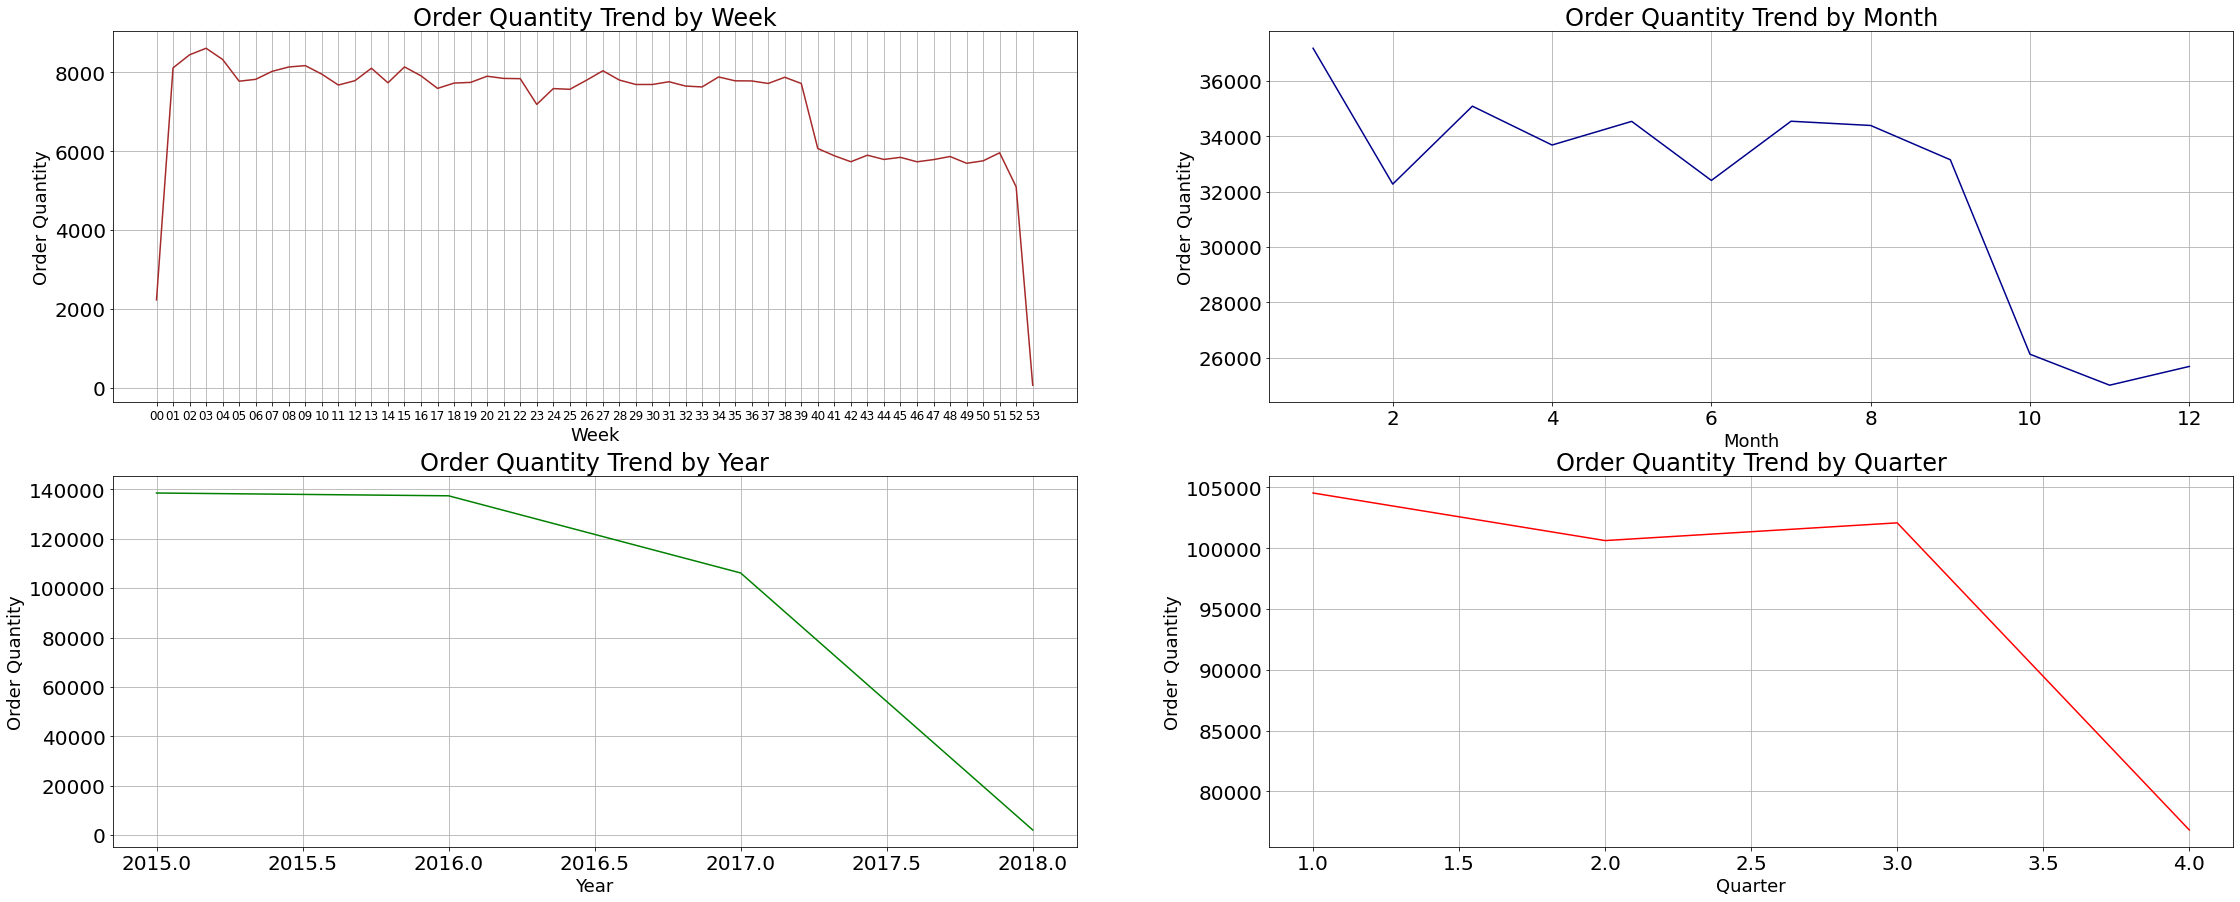

In [77]:
order_qty_by_week = df.groupby('week')['order_item_quantity'].sum()
order_qty_by_month = df.groupby('month')['order_item_quantity'].sum()
order_qty_by_year = df.groupby('year')['order_item_quantity'].sum()
order_qty_by_qtr = df.groupby('quarter')['order_item_quantity'].sum()

fig, axes = plt.subplots(2, 2, figsize=(38,15))

axes[0,0].plot(order_qty_by_week,color='brown')
axes[0,1].plot(order_qty_by_month,color='darkblue')
axes[1,0].plot(order_qty_by_year, color='green')
axes[1,1].plot(order_qty_by_qtr, color='red')

axes[0,0].set_title('Order Quantity Trend by Week', fontsize=24)
axes[0,1].set_title('Order Quantity Trend by Month', fontsize=24)
axes[1,0].set_title('Order Quantity Trend by Year', fontsize=24)
axes[1,1].set_title('Order Quantity Trend by Quarter', fontsize=24)

axes[0,0].set_xlabel('Week', fontsize=18)
axes[0,1].set_xlabel('Month', fontsize=18)
axes[1,0].set_xlabel('Year', fontsize=18)
axes[1,1].set_xlabel('Quarter', fontsize=18)

axes[0,0].set_ylabel('Order Quantity', fontsize=18)
axes[0,1].set_ylabel('Order Quantity', fontsize=18)
axes[1,0].set_ylabel('Order Quantity', fontsize=18)
axes[1,1].set_ylabel('Order Quantity', fontsize=18)

axes[0,0].tick_params(axis='x', labelsize=12)
axes[0,1].tick_params(axis='x', labelsize=20)
axes[1,0].tick_params(axis='x', labelsize=20)
axes[1,1].tick_params(axis='x', labelsize=20)

axes[0,0].tick_params(axis='y', labelsize=20)
axes[0,1].tick_params(axis='y', labelsize=20)
axes[1,0].tick_params(axis='y', labelsize=20)
axes[1,1].tick_params(axis='y', labelsize=20)

axes[0,0].grid(True)
axes[0,1].grid(True)
axes[1,0].grid(True)
axes[1,1].grid(True)

### 15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)

In [48]:
# Top 10 most ordered products
top_10_ordered_products = df['product_name_x'].value_counts().head(10)

# Top 10 most categories
top_10_categories = df['category_name'].value_counts().head(10)

# Top 10 cities by revenue
top_10_cities_revenue = df.groupby('order_city')['sales'].sum().nlargest(10)

# Top 10 cities by sale units (quantity)
top_10_cities_sale_units = df.groupby('order_city')['order_item_quantity'].sum().nlargest(10)

print("Top 10 Most Ordered Products:")
print(top_10_ordered_products)
print("\nTop 10 Most Categories:")
print(top_10_categories)
print("\nTop 10 Cities by Revenue:")
print(top_10_cities_revenue)
print("\nTop 10 Cities by Sale Units:")
print(top_10_cities_sale_units)


Top 10 Most Ordered Products:
product_name_x
Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
Nike Men's Free 5.0+ Running Shoe                12169
Under Armour Girls' Toddler Spine Surge Runni    10617
Fighting video games                               838
Name: count, dtype: int64

Top 10 Most Categories:
category_name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Name: count, dtype: int64

Top 10 Cities

### 16. Top payment methods by each product category.

In [49]:
# Group the data by 'product_category_id' and 'Type' (payment method) and calculate the sum of Sales for each combination
payment_by_category = df.groupby(['product_category_id', 'order_status'])['sales'].sum().reset_index()

# Find the top payment method for each product category
top_payment_methods = payment_by_category.groupby('product_category_id').apply(lambda x: x.loc[x['sales'].idxmax()])

# Reset the index for the resulting DataFrame
top_payment_methods = top_payment_methods.reset_index(drop=True)

# Rename the columns for clarity
top_payment_methods.columns = ['Product Category', 'Top Payment Method', 'Total Sales']

# Display the top payment methods by product category
print("Top Payment Methods by Product Category:")
top_payment_methods

Top Payment Methods by Product Category:


Product Category Top Payment Method  Total Sales
0                  2           Complete     10658.78
1                  3           Complete     28854.39
2                  4           Complete      8099.80
3                  5           Complete     12596.67
4                  6           Complete     13317.04
5                  7           Complete     14895.94
6                  9           Complete   1214859.42
7                 10           Complete     30957.73
8                 11           Complete     13141.89
9                 12           Complete     27900.49
10                13           Complete     38069.92
11                16           Complete      5299.47
12                17           Complete   1465736.27
13                18           Complete    957896.35
14                24           Complete   1046600.00
15                26           Complete     46427.27
16                29           Complete    430995.27
17                30           Complete     12583.90
18                31           Complete     13748.69
19                32           Complete     11626.25
20                33           Complete     39964.00
21                34           Complete      3569.79
22                35           Complete     36215.90
23                36           Complete     25339.56
24                37           Complete     85012.10
25                38           Complete     31853.43
26                40           Complete     45031.98
27                41           Complete     23897.91
28                43           Complete   1355009.71
29                44           Complete     19166.15
30                45           Complete   2257887.16
31                46           Complete    947970.65
32                48           Complete   1001750.03
33                59           Complete      3760.68
34                60           Complete      3899.28
35                61           Complete      1106.42
36                62           Complete     89503.92
37                63           Complete     73562.60
38                64           Complete    231000.00
39                65           Complete     37932.00
40                66           Complete     69683.48
41                67           Complete     26300.80
42                68           Complete     81484.74
43                69           Complete     39853.44
44                70           Complete     13283.55
45                71           Complete     34405.80
46                72           Complete     14601.20
47                73           Complete     38019.00
48                74           Complete      2123.36
49                75           Complete     10812.00
50                76           Complete     47048.76

### 17. Which shipping mode is more efficient interms of not delaying?

In [143]:
# Group the data by 'Shipping Mode' and calculate the proportion of on-time deliveries
shipping_mode_efficiency = df.groupby('shipping_mode')['late_delivery_risk'].value_counts().unstack().fillna(0)

# Calculate the proportion of not delayed (on-time) deliveries
efficient_shipping_modes = shipping_mode_efficiency['Not Late']

# Sort the shipping modes by efficiency (lowest proportion of delayed deliveries)
efficient_shipping_modes = efficient_shipping_modes.sort_values(ascending=False)

# Print the most efficient shipping mode
print("Most Efficient Shipping Mode in Terms of Not Delaying:")
print(efficient_shipping_modes.index[0])
pd.DataFrame(efficient_shipping_modes)

Most Efficient Shipping Mode in Terms of Not Delaying:
Standard Class


Not Late
shipping_mode           
Standard Class  64901.00
Second Class     7138.00
Same Day         5080.00
First Class         0.00

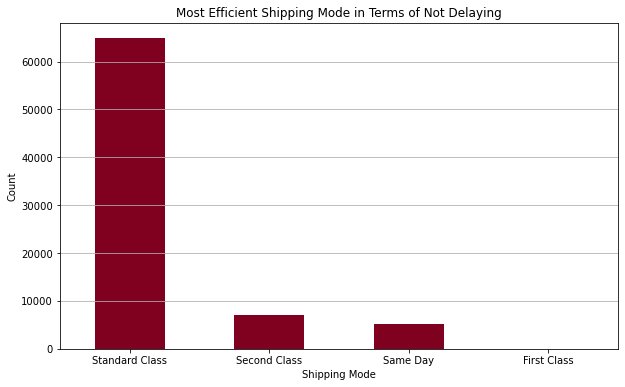

In [147]:
plt.figure(figsize=(10,6))
efficient_shipping_modes.plot(kind='bar',color='#800020')
plt.title('Most Efficient Shipping Mode in Terms of Not Delaying')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### 18. Number of orders, sales, qty  by order status

In [51]:
# Group the data by 'Order Status' and aggregate relevant metrics
order_status_summary = df.groupby('order_status').agg({ 'order_id':'count','sales': 'sum','order_item_quantity': 'sum'})
order_status_summary.columns = ['Number of Orders', 'Total Sales', 'Total Quantity']
order_status_summary = order_status_summary.sort_values(by='Number of Orders', ascending=False)

order_status_summary

Number of Orders  Total Sales  Total Quantity
order_status                                                  
Complete                    59491  12095314.95          126624
Pending Payment             39832   8106697.56           84736
Processing                  21902   4504063.75           46623
Pending                     20227   4120532.87           43196
Closed                      19616   4022624.17           41458
On Hold                      9804   1981542.71           20845
Suspected Fraud              4062    825934.96            8613
Canceled                     3692    744370.40            7875
Payment Review               1893    383653.66            4109

### 19. Which categories are most profitable categories (top5)?

In [148]:
# Group the data by 'Category Name' and calculate the total profit for each category
category_profit = df.groupby('category_name')['sales'].sum()

top_profitable_categories = category_profit.sort_values(ascending=False).head(5)

print("Top 5 Most Profitable Categories:")
pd.DataFrame(top_profitable_categories)

Top 5 Most Profitable Categories:


sales
category_name              
Fishing          6929653.69
Cleats           4431942.78
Camping & Hiking 4118425.57
Cardio Equipment 3694843.20
Women's Apparel  3147800.00

In [106]:
fig = px.bar(
    x=top_profitable_categories.index,
    y=top_profitable_categories.values,
    labels={'x': 'category_name', 'y': 'sum'},
    color=top_profitable_categories.index  # Separate color for each bar
)

fig.update_layout(
    title='Top 5 Most Profitable Categories',
    xaxis_title='Category Name',
    yaxis_title='Total Sale'
)
fig.show()

### 20. Which categoires have been given highest average discount (top5)?

In [112]:
category_avg_discount = df.groupby('category_name')['order_item_discount_rate'].mean()
top_discount_categories = category_avg_discount.sort_values(ascending=False).head(5)
top_discount_categories = pd.DataFrame(top_discount_categories)

print("Categories with the Highest Average Discount:")
top_discount_categories

Categories with the Highest Average Discount:


order_item_discount_rate
category_name                               
As Seen on  TV!                         0.11
Golf Shoes                              0.11
Strength Training                       0.11
Hunting & Shooting                      0.10
Baby                                    0.10

### 21. Any other analysis you can perform? (At least 5 additional analysis you required to work on beyond the supported questions)

### Customer Segment w.r.t Sales 

In [54]:
cust_seg = df.groupby('customer_segment')['sales'].sum()
sort_cust_seg = cust_seg.sort_values(ascending=False)
sort_cust_seg

customer_segment
Consumer      19095790.16
Corporate     11168406.84
Home Office    6520538.02
Name: sales, dtype: float64

### Customer Segment w.r.t Late Delivery Risk

In [55]:
df.groupby('customer_segment')['late_delivery_risk'].value_counts().unstack()

late_delivery_risk   Late  Not Late
customer_segment                   
Consumer            53573     39931
Corporate           31291     23498
Home Office         18536     13690

### Geospatial Analysis

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_10088/1884799597.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


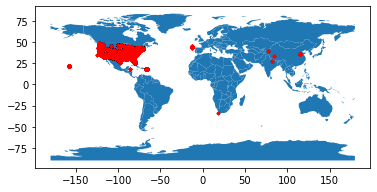

In [56]:
# Assuming 'Latitude' and 'Longitude' are your latitude and longitude columns
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

# Create a world map for visualization
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
world.plot()
# Plot your data on the map
gdf.plot(marker='o', color='red', markersize=5, ax=plt.gca())

plt.show()

### Top 10 Destination Countries w.r.t Sales 

In [57]:
ord_country_total_sales = df.groupby('order_country')['sales'].sum()
total_sales_ord = ord_country_total_sales.sort_values(ascending=False).head(10)
pd.DataFrame(total_sales_ord)

sales
order_country            
Estados Unidos 4879667.67
Francia        2879942.36
México         2633195.29
Alemania       2074171.82
Australia      1694621.67
Reino Unido    1612094.85
Brasil         1594319.95
China          1172902.11
Italia         1072181.67
India           962396.70

### Top 10 Costliest Product

In [58]:
unique_product_prices = df.groupby('product_name_x')['product_price'].agg(lambda x: x.unique()[0])
upp_sort = unique_product_prices.sort_values(ascending=False).head(10)
pd.DataFrame(upp_sort)

product_price
product_name_x                                       
SOLE E35 Elliptical                           1999.99
Dell Laptop                                   1500.00
SOLE E25 Elliptical                            999.99
Bowflex SelectTech 1090 Dumbbells              599.99
Bushnell Pro X7 Jolt Slope Rangefinder         599.99
Lawn mower                                     532.58
Porcelain crafts                               461.48
Web Camera                                     452.04
GoPro HERO3+ Black Edition Camera              399.99
Garmin Forerunner 910XT GPS Watch              399.99

### Top Performing Year (and Qtr) w.r.t Sales 

In [59]:
# Group the data by 'year' and 'quarter' and sum the sales
year_quarter_sales = df.groupby(['year', 'quarter'])['sales'].sum()
year_quarter_sales = year_quarter_sales.sort_values(ascending=False).reset_index()
year_quarter_sales

year  quarter      sales
0   2017        3 3357485.64
1   2017        2 3175893.43
2   2015        4 3136115.39
3   2016        4 3133128.86
4   2016        3 3096312.91
5   2015        2 3088947.89
6   2015        3 3085914.48
7   2017        1 3070237.70
8   2016        1 3040704.22
9   2016        2 3033671.33
10  2015        1 3029853.67
11  2017        4 2204819.37
12  2018        1  331650.12

### Top 10 Customers 

In [60]:
df['profit'] = df['sales'] * df['order_item_profit_ratio']

In [61]:
customer_data = df.groupby('customer_id').agg({'sales': 'sum', 'profit': 'sum'})
customer_data['customer_profitability'] = customer_data['sales'] - customer_data['profit']
customer_data = customer_data.sort_values(by='customer_profitability', ascending=False)

N = 10 
top_profitable_customers = customer_data.head(N)
print(top_profitable_customers)

               sales   profit  customer_profitability
customer_id                                          
791         10524.17 -1039.11                11563.28
12431        8073.15  -735.52                 8808.67
5715         8595.13  -178.24                 8773.37
12180        6924.48 -1802.61                 8727.09
1288         9019.11   472.42                 8546.69
664          8394.26   -68.97                 8463.23
4249         8918.85   492.33                 8426.52
633          5848.46 -2299.32                 8147.78
1011         8023.96   -63.39                 8087.36
9300         7891.21  -139.43                 8030.64


### Top 10 Destination Countries w.r.t Profit

In [120]:
profit_by_country = df.groupby('order_country')['profit'].sum()
profit_by_country = profit_by_country.sort_values(ascending=False).head(10).reset_index()
profit_by_country 

order_country    profit
0  Estados Unidos 602548.54
1         Francia 366286.58
2          México 339022.62
3        Alemania 216437.38
4          Brasil 207879.96
5     Reino Unido 200921.76
6       Australia 188763.16
7           China 136517.03
8          Italia 135167.04
9           India 110736.82

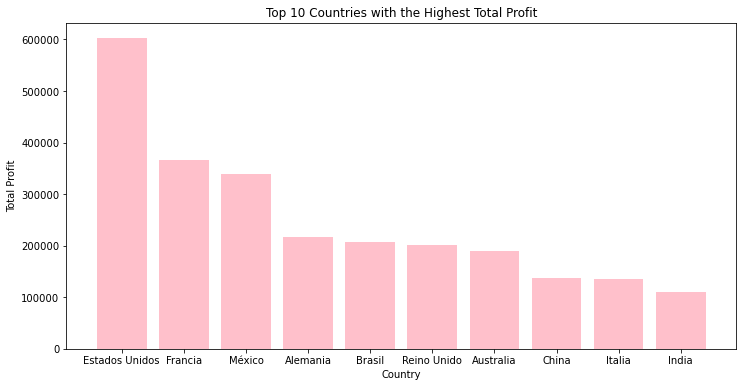

In [150]:
plt.figure(figsize=(12, 6))
plt.bar(profit_by_country ['order_country'], profit_by_country['profit'], color='pink')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Top 10 Countries with the Highest Total Profit')

# Rotating the x-axis labels for better visibility (optional)
plt.xticks(rotation=0)

# Display the chart
plt.show()

### Top 10 Departments 

In [63]:
dep_data = df.groupby('department_name').agg({'sales': 'sum', 'profit': 'sum'})
dep_data['department_profitability'] = dep_data['sales'] - dep_data['profit']
dep_data =dep_data.sort_values(by='department_profitability', ascending=False)
N = 10
top_profitable_dep = dep_data.head(N)
print(top_profitable_dep)

                        sales     profit  department_profitability
department_name                                                   
Fan Shop          17113870.94 2043164.86               15070706.08
Apparel            7976255.34  981792.79                6994462.55
Golf               4609028.24  552461.40                4056566.84
Footwear           4006498.77  459467.54                3547031.22
Outdoors           1253351.45  161397.74                1091953.71
Technology         1039598.97  126045.41                 913553.56
Fitness             397050.89   51633.20                 345417.69
Discs Shop          228887.73   27267.15                 201620.58
Health and Beauty   106080.48   10139.18                  95941.30
Pet Shop             41524.80    3907.72                  37617.08


### Top 10 Destination Countries w.r.t to Discount Rate 

In [64]:
oc = df.groupby('order_country')['order_item_discount_rate'].sum()
oc.sort_values(ascending=False).reset_index().head(10)

order_country  order_item_discount_rate
0  Estados Unidos                   2522.26
1         Francia                   1334.36
2          México                   1329.45
3        Alemania                    973.02
4       Australia                    868.72
5          Brasil                    810.27
6     Reino Unido                    743.87
7           China                    586.86
8          Italia                    511.93
9           India                    481.46

# d. Create visualizations of the analysis

In [160]:
# Have created the dashboard in excel with the below charts 

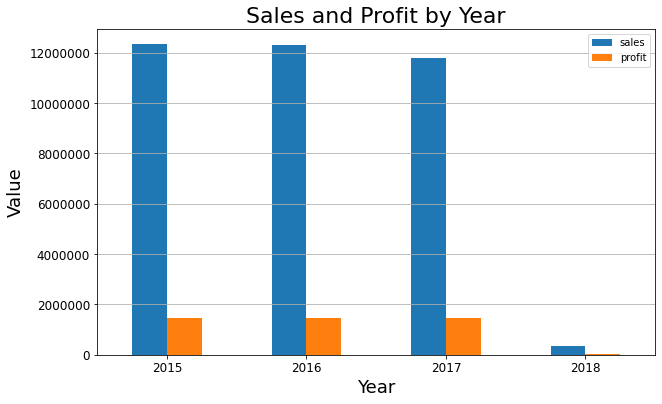

In [65]:
df_1 = df.groupby('year')[['sales','profit']].sum()

# Create a bar chart
df_1.plot(kind='bar', figsize=(10, 6))
plt.title('Sales and Profit by Year',fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Value',fontsize=18)
plt.grid(axis='y')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xticks(rotation=0)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

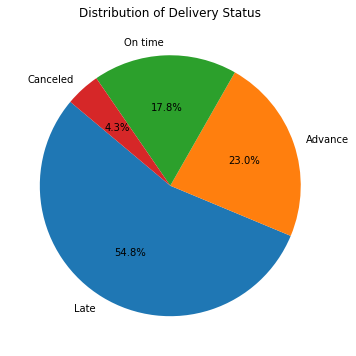

In [66]:
delivery_status_counts = df['delivery_status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Delivery Status')
plt.show()

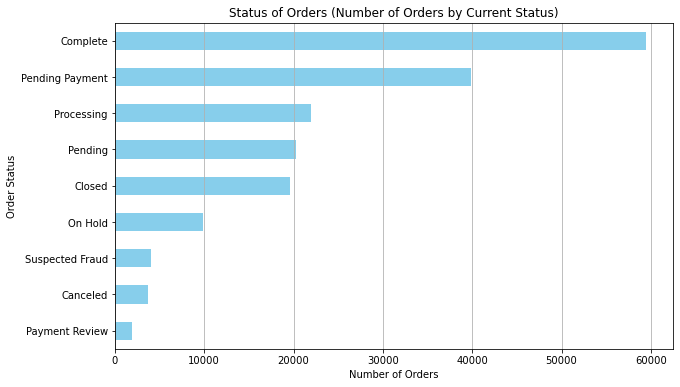

In [67]:
order_status_counts = df['order_status'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
order_status_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Orders')
plt.ylabel('Order Status')
plt.title('Status of Orders (Number of Orders by Current Status)')
plt.grid(axis='x')
plt.show()


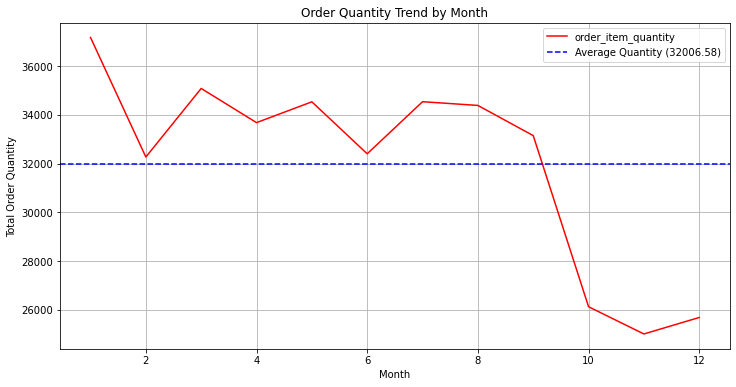

In [82]:
# Assuming 'order_date' is the date column and 'order_item_quantity' is the quantity column
order_quantity_by_month = df.groupby('month')['order_item_quantity'].sum()

# Calculate the mean of order_item_quantity
mean_quantity = order_quantity_by_month.mean()

# Create a line chart
plt.figure(figsize=(12, 6))
order_quantity_by_month.plot(kind='line', color='red')
plt.title('Order Quantity Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Order Quantity')
plt.grid(True)

# Add a horizontal line at the mean
plt.axhline(mean_quantity, color='blue', linestyle='--', label=f'Average Quantity ({mean_quantity:.2f})')

# Display the legend to show the mean value
plt.legend()

plt.show()


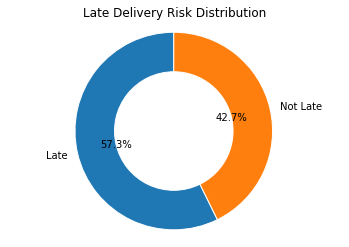

In [69]:
# Calculate the count of each value in the "Late Delivery Risk" column
late_delivery_counts = df['late_delivery_risk'].value_counts()

# Data for the pie chart
labels = late_delivery_counts.index
sizes = late_delivery_counts.values

# Create a pie chart with a "donut hole"
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Add a circle in the center to create the "donut" effect
center_circle = plt.Circle((0, 0), 0.3, color='white')
fig.gca().add_artist(center_circle)

# Set aspect ratio to be equal
ax.axis('equal')
plt.title('Late Delivery Risk Distribution')

# Display the chart
plt.show()

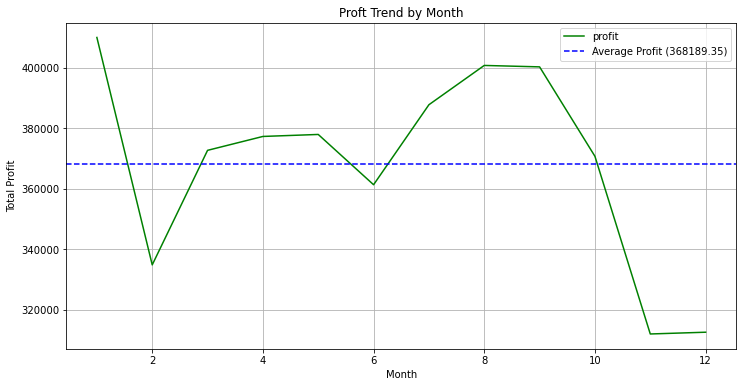

In [81]:
profit_by_month = df.groupby('month')['profit'].sum()

# Create a line chart
plt.figure(figsize=(12, 6))
profit_by_month.plot(kind='line', color='green')
plt.title('Proft Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

mean_profit = profit_by_month.mean()
plt.axhline(mean_profit, color='blue', linestyle='--', label=f'Average Profit ({mean_profit:.2f})')

plt.legend()
plt.show()

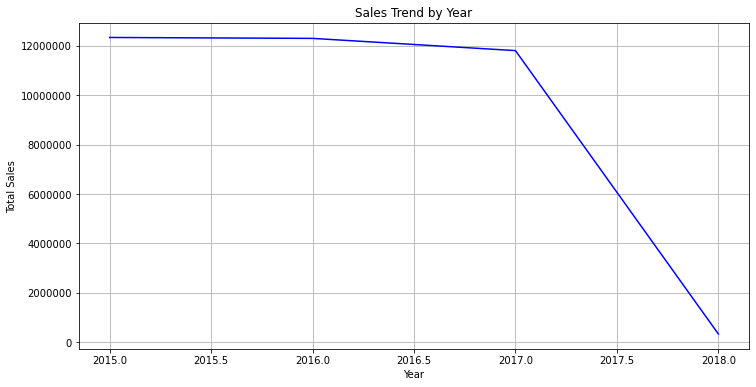

In [71]:
sales_by_year = df.groupby('year')['sales'].sum()

# Create a line chart
plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line', color='blue')
plt.title('Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

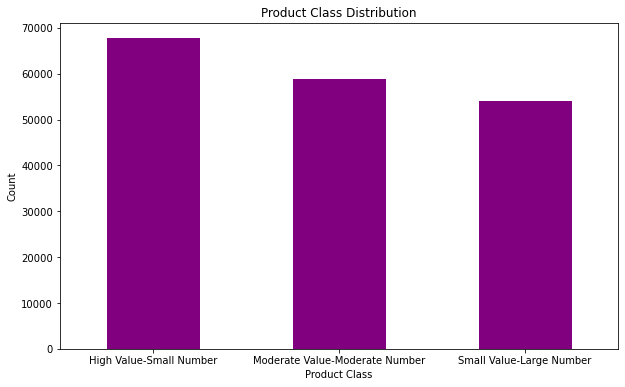

In [72]:
product_class_counts = df['product_class'].value_counts()
plt.figure(figsize=(10, 6))
product_class_counts.plot(kind='bar', color='purple')
plt.title('Product Class Distribution')
plt.xlabel('Product Class')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

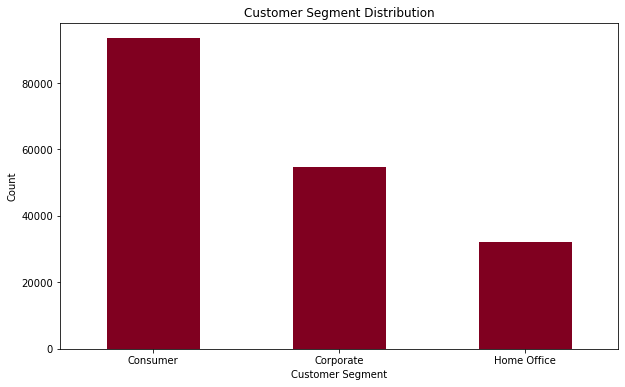

In [73]:
customer_segment_counts = df['customer_segment'].value_counts()

plt.figure(figsize=(10, 6))
customer_segment_counts.plot(kind='bar', color='#800020')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)  

plt.show()

In [74]:
df.groupby('shipping_mode')['late_delivery_risk'].value_counts().unstack()

late_delivery_risk     Late  Not Late
shipping_mode                        
First Class        27814.00       NaN
Same Day            4657.00   5080.00
Second Class       28078.00   7138.00
Standard Class     42851.00  64901.00

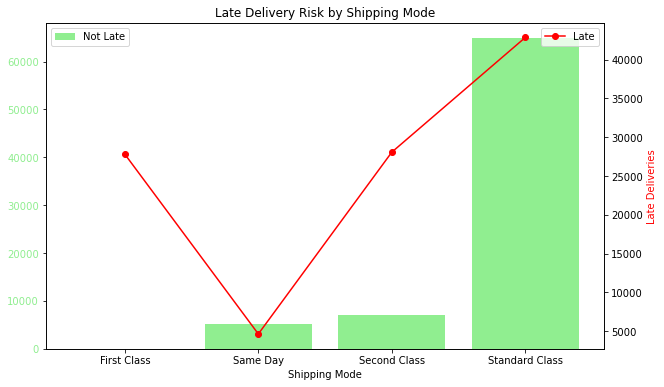

In [156]:
# Sample data (modify this according to your actual data)
shipping_mode_counts = {
    'Shipping Mode': ['First Class', 'Same Day', 'Second Class', 'Standard Class'],
    'Late': [27814, 4657, 28078, 42851],
    'Not Late': [0, 5080, 7138, 64901]
}

# Create the combo chart
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Late Delivery Risk by Shipping Mode')
ax1.set_xlabel('Shipping Mode')

# Plot 'Not Late' as bars in green
ax1.bar(shipping_mode_counts['Shipping Mode'], shipping_mode_counts['Not Late'], color='lightgreen', label='Not Late')
ax1.tick_params(axis='y', labelcolor='lightgreen')

ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

# Plot 'Late' as a line in red
ax2.plot(shipping_mode_counts['Shipping Mode'], shipping_mode_counts['Late'], color='red', marker='o', label='Late')
ax2.set_ylabel('Late Deliveries', color='red')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [76]:
data = {
    'product_type': ['DEBIT', 'TRANSFER', 'PAYMENT', 'CASH'],
    'count': [69295, 49883, 41725, 19616]
}

df_2 = pd.DataFrame(data)

fig = px.bar(df_2, x='product_type', y='count', color='product_type')

fig.update_layout(
    title='Product Type Counts',
    xaxis_title='Product Type',
    yaxis_title='Count'
)

fig.show()

# e. Predictive modeling & perform the tasks as per your understanding 

In [ ]:
# So in first I tried to find the best suitable for training the model by finding a good correlation 
# As we know a good positive (1) & a negative (-1) correlation are very suitable 
# And hence I did by proving it 

In [83]:
correlation = df['order_item_product_price'].corr(df['sales'])
print("Correlation between Product Price and Sales:", correlation)

Correlation between Product Price and Sales: 0.7899482013113847


In [84]:
correlation = df['sales_per_customer'].corr(df['sales'])
print("Correlation between Sale per Customer and Sales:", correlation)

Correlation between Sale per Customer and Sales: 0.989743881179086


In [86]:
# As I got a very strong Independent variable 
# I decided to use 'order_item_product_price', 'sales_per_customer' for future sale prediction

X = df[['order_item_product_price', 'sales_per_customer']]  # Independent variable
X = sm.add_constant(X)  # Add a constant (intercept) to the model
y = df['sales']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 4.484e+06
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:55:33   Log-Likelihood:            -7.8365e+05
No. Observations:              180519   AIC:                         1.567e+06
Df Residuals:                  180516   BIC:                         1.567e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [88]:
# Save the trained model to a .pkl file
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)

['linear_regression_model.pkl']

In [ ]:
# I used Ordinary Least Squares a method used for Linear Regression 
# Overall, the model exaplins the summary of how the 'order_item_product_price' & 'sales_per_customer' is directly proportional to the change in sales
# 'order_item_product_price' & 'sales_per_customer' are positively associated with 'sales'
# The R-squared: 0.980 which indicates that approximately 98% of the variance in sales is explained by the independent variables in the model.
# In high standards we can come to a conclusion of hypothesis testing as well were there is a significant relationship between the independent variable and the dependent variable.
# Infact, rejecting the null hypothesis because the P_value is less than 0.05 
# The model appears to be a good fit for the data.